# Función en R para simular una cadena de Markov

In [1]:
rMarkov <- function(P, n = 100, mu0 = rep(1, nrow(P))/nrow(P)) {
# P: matriz de transici´on (sin valor por defecto)
# n: n´umero de simulaciones (100 por defecto)
# mu0: distribuci´on inicial (uniforme en el espacio de estados por defecto)
# si el espacio de estados est´a en los nombres de las columnas de P, usarlo
if(length(colnames(P)) == 0) estados <- 1:ncol(P) else estados <- colnames(P)
# funci´on de iniciaci´on:
func.inic <- cumsum(mu0)
# funciones de actualizaci´on:
func.act <- t(apply(P, 1, cumsum))
U <- runif(n) # uniformes U1,...,Un en [0,1]
X <- numeric(n)*NA # vector de valores simulados de la cadena, a completar
# primer valor de la cadena
j = 1; while(U[1] > func.inic[j]) j = j + 1;
X[1] <- estados[j]
# restantes valores de la cadena
for (i in 2:n) {
j = 1; while(U[i] > func.act[X[i - 1], j]) j = j + 1;
X[i] <- estados[j]
}
X
}

Si consideramos un espacio de estaos E={A,C,G,T} (A=adenina,C=citosina,G=guanina,T=timina)

In [13]:
#sea la matriz de transición entre estados P
vector=c(.2,.25,.4,0.15,.1,.6,.1,.2,.2,.1,.35,.35,.1,.45,.2,.25)
P=matrix(vector,4,4,T)
P

0.2,0.25,0.40,0.15
0.1,0.60,0.10,0.20
0.2,0.10,0.35,0.35
0.1,0.45,0.20,0.25


In [32]:
X=rMarkov(P,1000)
X[1:100]

[1] 4 3 3 4 2 3 4 2 2 2 2 1 3 4 3 4 3 4 2 4 2 2 2 2 2 2 1 3 1 2 1 3 3 4 2 2 1
 [38] 3 1 1 3 3 4 4 1 2 4 2 4 4 2 2 4 4 2 4 4 1 4 1 3 3 4 3 4 3 3 3 4 4 4 2 2 2
 [75] 4 3 3 3 3 3 1 3 3 1 2 2 1 2 2 2 1 1 2 2 2 3 1 2 1 3

### Un pequeño grafico viene a ser

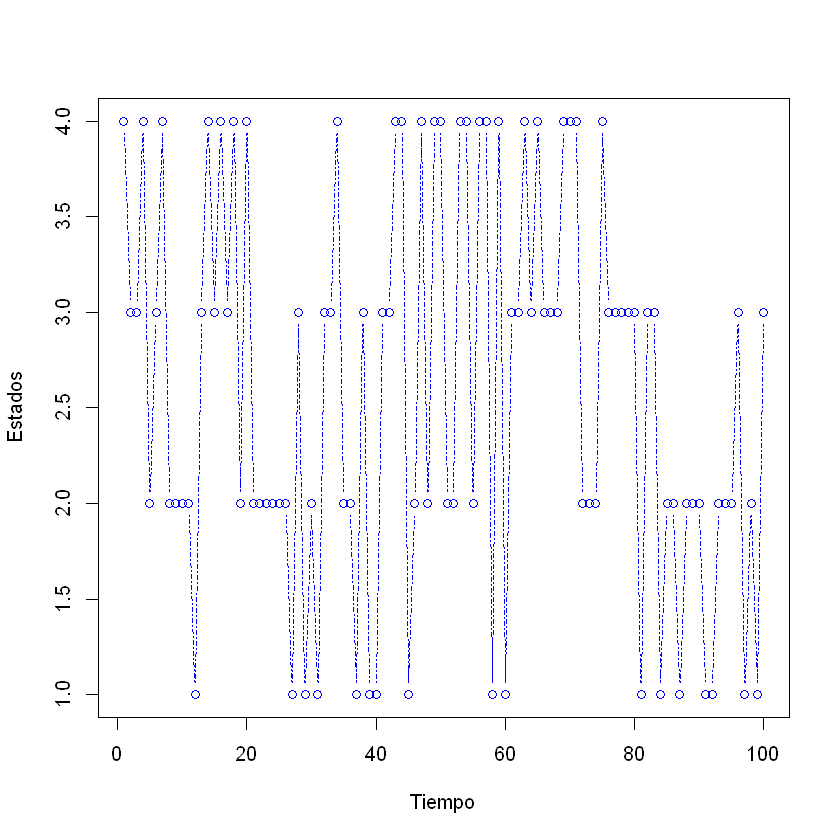

In [33]:
plot(1:100, X[1:100],type= 'b',col = 'blue',lwd = 1,las =.2, ylab= 'Estados',xlab='Tiempo',lty=10)


In [34]:
X[X==1]='A'
X[X==2]='C'
X[X==3]='G'
X[X==4]='T'
as.factor(X)

## Frecuencia relativa de visitas a cada estado

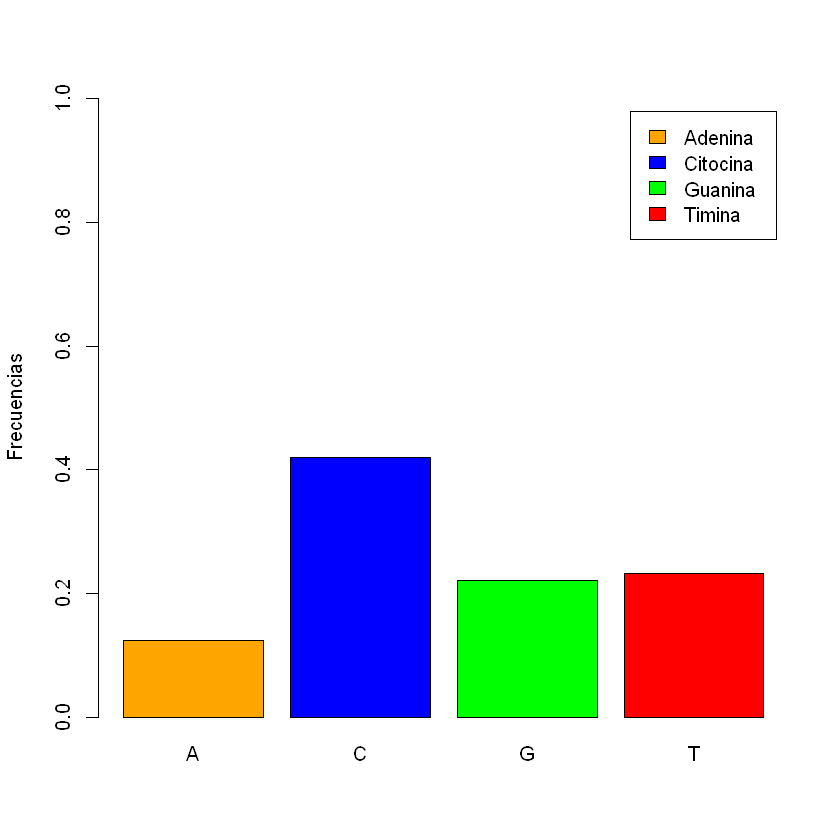

In [51]:
barplot(table(X)/1000,col=c("orange","blue","green","red"),ylim=c(0,1),ylab = "Frecuencias",
        legend.text = c("Adenina","Citocina","Guanina","Timina"))